In [1]:
import os
import struct
import numpy as np
import pandas as pd
import networkx as nx
import scipy
from scipy.stats import entropy
from scipy.sparse import csr_matrix 
from tqdm import tqdm
from matplotlib import pyplot as plt
from collections import defaultdict
import pickle
import random
import argparse
from scipy.sparse import identity
from scipy.sparse.linalg import inv
from scipy import special
from time import sleep
import matplotlib.pyplot as plt
import heapq
from scipy.stats import gaussian_kde
from functions import absorbing_markov

In [ ]:
###Stationary transaction graphs
entropiesBTC = np.load('experiments/bitcoin_pk/entropies.npy')
entropiesZcash = np.load('experiments/zcash_pk/entropies_modified.npy')
entropiesETH = np.load('experiments/ethereum_pk/entropies.npy')
entropiesDAI = np.load("experiments/dai_pk/entropies.npy")
entropiesUSDC = np.load("experiments/usdc_pk/entropies.npy")
print(len(entropiesBTC),len(entropiesZcash),len(entropiesETH),len(entropiesDAI),len(entropiesUSDC))

##ZcashUnmodified
entropiesZcashUnmodified = np.load('experiments/zcash_pk/entropies.npy')

### Temporary transaction graphs
entropiesBTCTemporary = np.load('experiments/bitcoin_utxo/entropies.npy')
entropiesZcashTemporary = np.load('experiments/zcash_utxo/entropies_modified.npy')
# entropiesETHTemporary = np.load('experiments/ethereum_utxo/entropies.npy')
entropiesDAITemporary = np.load("experiments/dai_utxo/entropies.npy")
entropiesUSDCTemporary = np.load("experiments/usdc_utxo/entropies.npy")

8569892 170841 2248368 46160 146378


In [ ]:
btc_unspents = np.load('experiments/bitcoin_pk/unspent.npy')
zcash_unspents = np.load('experiments/zcash_pk/unspent.npy')
eth_unspents = np.load('experiments/ethereum_pk/unspent.npy')
dai_unspents = np.load("experiments/dai_pk/unspent.npy")
usdc_unspents = np.load("experiments/usdc_pk/unspent.npy")
#entropiesZcash = entropiesZcash[zcash_unspents]
print(len(btc_unspents),len(zcash_unspents),len(eth_unspents),len(dai_unspents),len(usdc_unspents))
entropiesBTC = 1.4426950*entropiesBTC[btc_unspents]
entropiesZcash = 1.4426950*entropiesZcash[zcash_unspents]
entropiesETH = 1.4426950*entropiesETH[eth_unspents]
entropiesDAI = 1.4426950*entropiesDAI[dai_unspents]
entropiesUSDC = 1.4426950*entropiesUSDC[usdc_unspents]
entropiesZcashUnmodified = entropiesZcashUnmodified[zcash_unspents]

4237925 94100 1768192 18494 47888


Currency Mean Median Variance Max
Zcash Unmodified 0.9742505699660328 0.4674493285975361 1.3803001214910333 7.396850163961701
Zcash 2.632550482984822 0.9027736733839029 15.379268237106457 15.70564226593558
BTC 3.9735571996915175 4.080127794193103 10.125519552204524 11.820439119585119
ETH 3.459235708246252 3.9455525743171607 5.984376297320902 10.869582357106225
DAI 2.6095750702315113 3.3097859025007543 1.987812227626025 5.145286510477991
USDC 3.6433674697441076 4.245632042084668 2.13430844167712 7.549290073822255


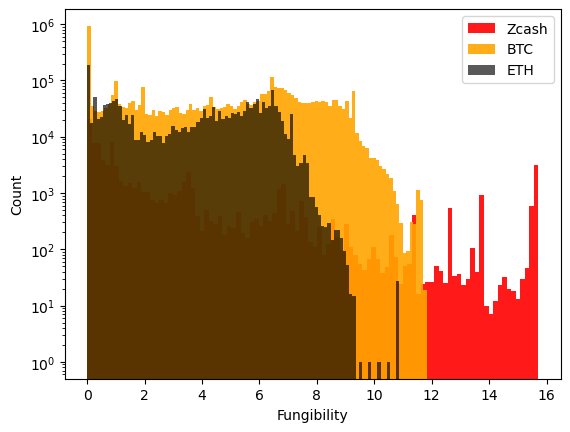

In [ ]:
#plt.hist(entropiesUSDCTemporary,bins=100, alpha=1, color='black',density=True, label='Zcash Unmodified')
plt.hist(entropiesZcash,bins=100, alpha=0.9, color='red', label='Zcash')
plt.hist(entropiesBTC, bins=100, alpha=0.9,color='#FFA500', label='BTC')
plt.hist(entropiesETH, bins=100, alpha=0.65, color='black', label='ETH')
print("Currency","Mean","Median","Variance","Max")
print("Zcash Unmodified",np.mean(entropiesZcashUnmodified),np.median(entropiesZcashUnmodified),np.var(entropiesZcashUnmodified),np.max(entropiesZcashUnmodified))
print("Zcash",np.mean(entropiesZcash),np.median(entropiesZcash),np.var(entropiesZcash),np.max(entropiesZcash))
print("BTC",np.mean(entropiesBTC),np.median(entropiesBTC),np.var(entropiesBTC),np.max(entropiesBTC))
print("ETH",np.mean(entropiesETH),np.median(entropiesETH),np.var(entropiesETH),np.max(entropiesETH))
print("DAI",np.mean(entropiesDAI),np.median(entropiesDAI),np.var(entropiesDAI),np.max(entropiesDAI))
print("USDC",np.mean(entropiesUSDC),np.median(entropiesUSDC),np.var(entropiesUSDC),np.max(entropiesUSDC))

#print("Temporary transaction graphs")
#print("Zcash",np.mean(entropiesZcashTemporary),np.median(entropiesZcashTemporary),np.var(entropiesZcashTemporary),np.max(entropiesZcashTemporary))
#print("BTC",np.mean(entropiesBTCTemporary),np.median(entropiesBTCTemporary),np.var(entropiesBTCTemporary),np.max(entropiesBTCTemporary))
#print("ETH",np.mean(entropiesETHTemporary),np.median(entropiesETHTemporary),np.var(entropiesETHTemporary),np.max(entropiesETHTemporary))
#print("DAI",np.mean(entropiesDAITemporary),np.median(entropiesDAITemporary),np.var(entropiesDAITemporary),np.max(entropiesDAITemporary))
#print("USDC",np.mean(entropiesUSDCTemporary),np.median(entropiesUSDCTemporary),np.var(entropiesUSDCTemporary),np.max(entropiesUSDCTemporary))
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel("Fungibility") 
plt.ylabel("Count")
plt.savefig("fig/BTCETHZcashEntropiesHist.pdf")
plt.show()

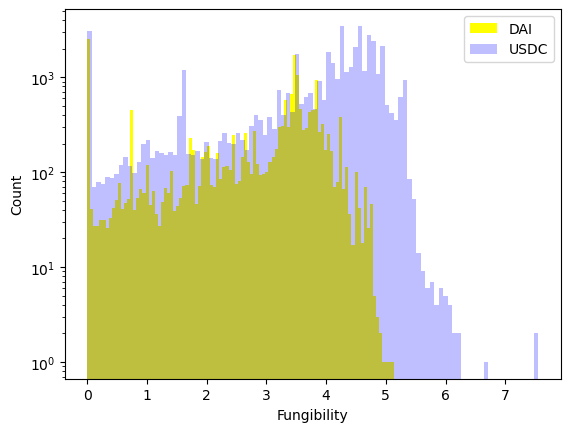

In [8]:
plt.hist(entropiesDAI, bins=100, alpha=1, color='yellow', label='DAI')
plt.hist(entropiesUSDC, bins=100, alpha=0.25, color='blue',label='USDC')
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel("Fungibility") 
plt.ylabel("Count")
plt.savefig("fig/DAIvsUSDCEntropiesHist.pdf")
plt.show()